In [34]:
#importing libraries and dataset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('data_bc.csv')
X = data.iloc[:,1:31]
Y=data.iloc[:,31].values

In [48]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [49]:
#dropping columns with null values
data = data.dropna(axis = 1)

In [50]:
#gives the shape of dataset
print("Cancer data set dimensions : {}".format(data.shape))

Cancer data set dimensions : (569, 32)


In [51]:
#number of Malignant and Benign 
count = data['diagnosis'].value_counts()
count

0    357
1    212
Name: diagnosis, dtype: int64

In [37]:
data.isnull().sum()
data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [53]:
#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
data.iloc[:,1] = labelencoder_Y.fit_transform(data.iloc[:,1].values)
print(labelencoder_Y.fit_transform(data.iloc[:,1].values))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [54]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [59]:
#pair of independent variables with correlation greater than 0.5
k = data.corr()
z = [[str(i), str(j)] for i in k.columns for j in k.columns if (k.loc[i,j] > abs(0.5))&(i!=j)]
z, len(z)

([['diagnosis', 'radius_mean'],
  ['diagnosis', 'perimeter_mean'],
  ['diagnosis', 'area_mean'],
  ['diagnosis', 'compactness_mean'],
  ['diagnosis', 'concavity_mean'],
  ['diagnosis', 'concave points_mean'],
  ['diagnosis', 'radius_se'],
  ['diagnosis', 'perimeter_se'],
  ['diagnosis', 'area_se'],
  ['diagnosis', 'radius_worst'],
  ['diagnosis', 'perimeter_worst'],
  ['diagnosis', 'area_worst'],
  ['diagnosis', 'compactness_worst'],
  ['diagnosis', 'concavity_worst'],
  ['diagnosis', 'concave points_worst'],
  ['radius_mean', 'diagnosis'],
  ['radius_mean', 'perimeter_mean'],
  ['radius_mean', 'area_mean'],
  ['radius_mean', 'compactness_mean'],
  ['radius_mean', 'concavity_mean'],
  ['radius_mean', 'concave points_mean'],
  ['radius_mean', 'radius_se'],
  ['radius_mean', 'perimeter_se'],
  ['radius_mean', 'area_se'],
  ['radius_mean', 'radius_worst'],
  ['radius_mean', 'perimeter_worst'],
  ['radius_mean', 'area_worst'],
  ['radius_mean', 'concavity_worst'],
  ['radius_mean', 'concav

In [60]:
X = data.iloc[:, 2:31].values
Y = data.iloc[:,1].values

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state=101)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((426, 29), (143, 29), (426,), (143,))

In [62]:
#Scaling the dataset
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)
lr.fit(X_train, Y_train)

LinearRegression(normalize=True)

In [63]:
lr.coef_

array([-1.25533013e-01,  1.62978681e-04,  1.17953185e-02,  2.02009691e-04,
       -2.79351298e+00, -4.15123863e+00,  1.36235929e+00,  1.92092576e+00,
        1.40020300e+00,  3.36042355e+00,  9.74977969e-01, -4.92397332e-03,
       -9.59694689e-02, -3.52593543e-04,  5.97070252e+00, -7.76982562e-01,
       -4.79358524e+00,  1.12629897e+01,  3.89560166e+00,  5.27590573e+00,
        1.75848170e-01,  1.00445521e-02, -1.57346305e-03, -1.01127940e-03,
        2.38178856e+00,  4.47992209e-01,  5.54292192e-01,  8.69424866e-01,
       -6.33558406e-02])

In [64]:
predictions = lr.predict(X_test)

In [69]:
lr.score(X_test, Y_test)

-1761.6000097548722

In [70]:
#feature scaling
from sklearn import preprocessing
scale = preprocessing.StandardScaler()

In [73]:
X_train = scale.fit_transform(X_train)
X_train

array([[-0.24158009, -0.25233871, -0.28593015, ..., -0.39972808,
        -0.14257025, -1.07012426],
       [-0.39595215, -0.49936108, -0.43539869, ..., -0.39456128,
        -0.23352397,  0.57196643],
       [ 0.21592257, -0.38162145,  0.18779528, ..., -0.31330158,
        -0.46781709,  1.09553158],
       ...,
       [ 0.57238169,  0.077794  ,  0.52348693, ...,  0.04790481,
         0.57868208, -0.41170142],
       [ 1.33020818,  0.48872842,  1.29124883, ...,  0.89572994,
         1.38041098,  1.2208699 ],
       [-0.09001479, -0.14614217, -0.10419927, ..., -0.37201523,
         0.22033355, -0.09597577]])

In [74]:
X_test = scale.fit_transform(X_test)
X_test

array([[-0.60856611, -0.16219339, -0.63793011, ..., -0.39558176,
        -0.49665356,  0.18680362],
       [-0.11105729, -0.7728038 , -0.18011613, ..., -0.81706329,
        -0.64862222, -0.2583254 ],
       [-0.4456912 , -0.68932191, -0.48830103, ..., -0.48450409,
        -0.52846095,  0.25754117],
       ...,
       [ 0.9431876 ,  0.98031593,  1.0619753 , ...,  1.26361624,
         1.27318984, -0.98985526],
       [-0.8277069 , -0.24806048, -0.74972684, ...,  0.24640656,
         0.38196813, -0.37047031],
       [ 0.32130157,  0.44364662,  0.37759227, ...,  0.77325847,
         1.48523915,  0.22130974]])

In [75]:
data['diagnosis_mean'] = data['diagnosis'].mean()
data['diagnosis_mean'].head()

0    0.372583
1    0.372583
2    0.372583
3    0.372583
4    0.372583
Name: diagnosis_mean, dtype: float64

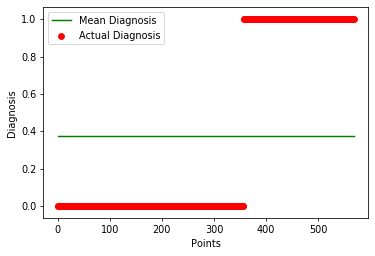

In [77]:
plt.figure(dpi=70)
k = range(0, len(data))
plt.scatter(k, data['diagnosis'].sort_values(), color = 'red', label='Actual Diagnosis')
plt.plot(k, data['diagnosis_mean'].sort_values(), color = 'green', label='Mean Diagnosis')
plt.xlabel('Points')
plt.ylabel('Diagnosis')
plt.legend()

In [78]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [105]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
"""
from sklearn.metrics import precision_score
Precision = precision_score(Y_test, Y_pred)
from sklearn.metrics import recall_score
Recall = recall_score(Y_test, Y_pred)
#f1 = 2/((1/Precision)+(1/Recall))
from sklearn.metrics import f1_score
F1=f1_score(Y_test, Y_pred)  
Precision,Recall, F1
"""
from sklearn.metrics import classification_report
k = classification_report(Y_test, Y_pred)
print(k)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        88
           1       1.00      0.96      0.98        55

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143



In [85]:
Y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [86]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
classifier.score(X_test, Y_test)

0.986013986013986

In [84]:
m=np.trace(cm)
x = cm[0][0]/m
print(x)

0.624113475177305


In [87]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm
classifier.score(X_test, Y_test)


0.965034965034965

In [90]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm
classifier.score(X_test, Y_test)

0.986013986013986

In [91]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm
classifier.score(X_test, Y_test)

0.986013986013986

In [92]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm
classifier.score(X_test, Y_test)

0.951048951048951

In [93]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm
classifier.score(X_test, Y_test)

0.9440559440559441

In [94]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm
classifier.score(X_test, Y_test)

0.9440559440559441